# Plots and Analysis of Data

#### Ryan Doughty

## Dependencies and Data information

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import glob
import sys
import math

In [6]:
sample_types = {
    1: 'Normal',
    2: 'Normal',
    3: '',
    4: 'NAA',
    5: 'Normal',
    6: '',
    7: 'CCR',
    8: 'AA',
    9: 'AA',
    10: 'Normal',
    11: 'AA',
    12: 'Normal',
    13: 'Normal',
    14: 'CCR',
    15: 'Normal',
    16: 'AA',
    17: 'Normal',
    18: 'AA',
    19: 'AA',
    20: 'CCR',
    21: 'Normal',
    22: 'CCR',
    23: 'AA',
    24: 'Normal',
    25: 'NAA',
    26: 'AA',
    27: 'NAA',
    28: 'AA',
    29: 'Normal',
    30: 'NAA',
    31: 'Normal',
    32: 'AA',
    33: 'CCR',
    34: 'NAA',
    35: 'Normal',
    36: 'CCR',
    37: 'AA',
    38: 'CCR',
    39: 'NAA',
    40: 'Normal',
    41: 'AA',
    42: 'AA',
    43: 'CCR',
    44: 'NAA',
    45: 'AA',
    46: 'AA',
    47: 'AA',
    48: 'AA',
    49: 'Normal',
    50: 'AA',
    51: 'Normal',
    52: 'AA',
    53: 'NAA',
    54: 'AA',
    55: 'CCR',
    56: 'Normal',
    57: 'AA',
    58: 'Normal',
    59: 'AA',
    60: 'AA',
    61: 'Normal'
}

batch = {
    1: 6,
    2: 6,
    3: -1,
    4: 6,
    5: 6,
    6: -1,
    7: 1,
    8: 1,
    9: 1,
    10: 1,
    11: 1,
    12: 1,
    13: 1,
    14: 1,
    15: 2,
    16: 2,
    17: 2,
    18: 2,
    19: 2,
    20: 2,
    21: 2,
    22: 3,
    23: 3,
    24: 3,
    25: 3,
    26: 3,
    27: 3,
    28: 3,
    29: 3,
    30: 4,
    31: 4,
    32: 4,
    33: 4,
    34: 4,
    35: 4,
    36: 4,
    37: 5,
    38: 6,
    39: 6,
    40: 5,
    41: 5,
    42: 5,
    43: 5,
    44: 5,
    45: 6,
    46: 6,
    47: 7,
    48: 7,
    49: 7,
    50: 7,
    51: 7,
    52: 7,
    53: 7,
    54: 7,
    55: 8,
    56: 8,
    57: 8,
    58: 8,
    59: 8,
    60: 8,
    61: 8
}

run = {
    1: 8,
    2: 8,
    3: -1,
    4: 8,
    5: 8,
    6: -1,
    7: 4,
    8: 4,
    9: 4,
    10: 4,
    11: 4,
    12: 4,
    13: 1,
    14: 1,
    15: 1,
    16: 1,
    17: 1,
    18: 1,
    19: 2,
    20: 2,
    21: 2,
    22: 2,
    23: 2,
    24: 3,
    25: 3,
    26: 3,
    27: 3,
    28: 3,
    29: 3,
    30: 6,
    31: 6,
    32: 6,
    33: 6,
    34: 6,
    35: 6,
    36: 7,
    37: 7,
    38: 8,
    39: 9,
    40: 7,
    41: 7,
    42: 7,
    43: 7,
    44: 8,
    45: 9,
    46: 9,
    47: 9,
    48: 9,
    49: 9,
    50: 10,
    51: 10,
    52: 10,
    53: 10,
    54: 10,
    55: 10,
    56: 5,
    57: 5,
    58: 5,
    59: 5,
    60: 5,
    61: -1
}

In [7]:
overall_data = pd.read_csv('../../AECC_patients_data/output/fast_output.csv', index_col=1).drop('Unnamed: 0', axis=1).sort_index()
overall_data

,total_reads,total_assigned_reads,assigned_percent,viral_reads,reads_percent_viral,unique_assignments,unique_species,total_species_assignments,unique_genuses,total_genus_assignments,unique_families,total_family_assignments
filename,,,,,,,,,,,,
2303_P1-32635_stool_virome_CACTI_Microbiome8_R1,3448877,2634780,76.40,39847,1.51,1164,1074,39805,414,35217,114,37555
2303_P1-32635_stool_virome_CACTI_Microbiome8_R2,3448877,2630518,76.27,39845,1.51,1158,1059,39811,414,35154,116,37559
2303_P10-64142_stool_virome_CACTI_Microbiome4_R1,4584070,1060223,23.13,4062,0.38,267,246,4062,128,3707,75,3959
2303_P10-64142_stool_virome_CACTI_Microbiome4_R2,4584070,1042763,22.75,2882,0.28,270,245,2882,130,2571,72,2794
2303_P11-65514_stool_virome_CACTI_Microbiome4_R1,3405910,984017,28.89,85468,8.69,379,345,85468,169,84205,75,85297
...,...,...,...,...,...,...,...,...,...,...,...,...
2304_P53-04629_stool_virome_CACTI_Microbiome10_R2,3927195,980281,24.96,63408,6.47,375,338,63393,151,62866,77,62814
2304_P54-58281_stool_virome_CACTI_Microbiome10_R1,4021490,1197628,29.78,90985,7.60,279,251,90983,117,77704,56,90749
2304_P54-58281_stool_virome_CACTI_Microbiome10_R2,4021490,1190470,29.60,90847,7.63,277,255,90846,119,77448,59,90586


In [8]:
viral_data = overall_data['viral_reads']
avg = np.mean(viral_data)
median = np.median(viral_data)
std = np.std(viral_data)
min = np.min(viral_data)
max = np.max(viral_data)

print(f'Average viral reads: {avg}')
print(f'Median viral reads: {median}')
print(f'Min viral reads: {min}')
print(f'Max viral reads: {max}')
print(f'Std viral reads: {std}')

Average viral reads: 485224.5416666667
Median viral reads: 95250.0
Min viral reads: 2436
Max viral reads: 4007434
Std viral reads: 760104.1356885022


## Useful Functions

In [9]:
def sample_to_cancer(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return sample_types[int(sample)]
    except:
        return sample
    
def sample_to_batch(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return str(batch[int(sample)])
    except:
        return sample
    
def sample_to_run(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return str(run[int(sample)])
    except:
        return sample

## Family Level Tax Breakdown

In [5]:
family_data = pd.read_csv('../../AECC_patients_data/output/family_data.csv', index_col=0).fillna(0)

def sample_to_cancer(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return sample_types[int(sample)]
    except:
        return sample

number_to_keep = 6
family_data

family_data = family_data.div(family_data.sum(axis=0), axis=1)*100
family_data['mean'] = family_data.iloc[:, :].mean(axis=1, skipna=True)
family_data = family_data.sort_values(by='mean', ascending=False).drop('mean', axis=1)
family_data.loc['other'] = family_data.iloc[number_to_keep:].sum(axis=0)
family_data = family_data.drop(family_data.index[range(number_to_keep, len(family_data.index)-1)])
family_data = family_data.T.sort_index()


family_data.reset_index(inplace=True)
family_data['sample_type'] = family_data['index'].apply(sample_to_cancer)
family_data = family_data.sort_values(by=['sample_type', 'index'])
family_data.set_index('index', drop=True, inplace=True)
family_data

,Microviridae,Virgaviridae,Retroviridae,Mimiviridae,Polyomaviridae,Inoviridae,other,sample_type
index,,,,,,,,
2303_P11-65514_stool_virome_CACTI_Microbiome4_R1.tsv,95.325744,0.440813,0.218062,0.016413,0.012896,0.018758,3.967314,AA
2303_P11-65514_stool_virome_CACTI_Microbiome4_R2.tsv,95.554874,0.441209,0.225324,0.023594,0.012977,0.010617,3.731405,AA
2303_P16-73253_stool_virome_CACTI_Microbiome1_R1.tsv,99.958704,0.000668,0.002157,0.000360,0.000000,0.000000,0.038112,AA
2303_P16-73253_stool_virome_CACTI_Microbiome1_R2.tsv,99.961475,0.000616,0.002414,0.000462,0.000051,0.000000,0.034981,AA
2303_P18-32701_stool_virome_CACTI_Microbiome1_R1.tsv,74.250951,0.000000,2.311787,0.258555,0.000000,0.000000,23.178707,AA
...,...,...,...,...,...,...,...,...
2304_P51-65258_stool_virome_CACTI_Microbiome10_R2.tsv,50.892256,2.548919,0.218915,0.055626,0.002692,0.000897,46.280695,Normal
2303_Pmock-00001_stool_virome_CACTI_Microbiome5_R1.tsv,25.450053,4.694670,2.117896,1.023650,0.141193,0.070597,66.501941,mock
2303_Pmock-00001_stool_virome_CACTI_Microbiome5_R2.tsv,28.045437,5.209557,2.311007,1.175088,0.078339,0.078339,63.102233,mock


In [6]:
sample_to_color = {'CCR': 'red', 'Normal': 'Green', 'AA': 'Yellow', 'NAA': 'Orange'}

In [7]:
counts = family_data['sample_type'].value_counts().sort_index()

tick_locations = [0]
label_locations = []
total = 0
for count in counts:
    label_location = total + count / 2
    label_locations.append(label_location)
    total += count
    tick_locations.append(total)

counts.index


Index(['AA', 'CCR', 'NAA', 'Normal', 'mock', 'ntc'], dtype='object')

/tmp/ipykernel_3508711/3110647714.py:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (idx, family), color in zip(family_data.iteritems(), color_map.values()):
/tmp/ipykernel_3508711/3110647714.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


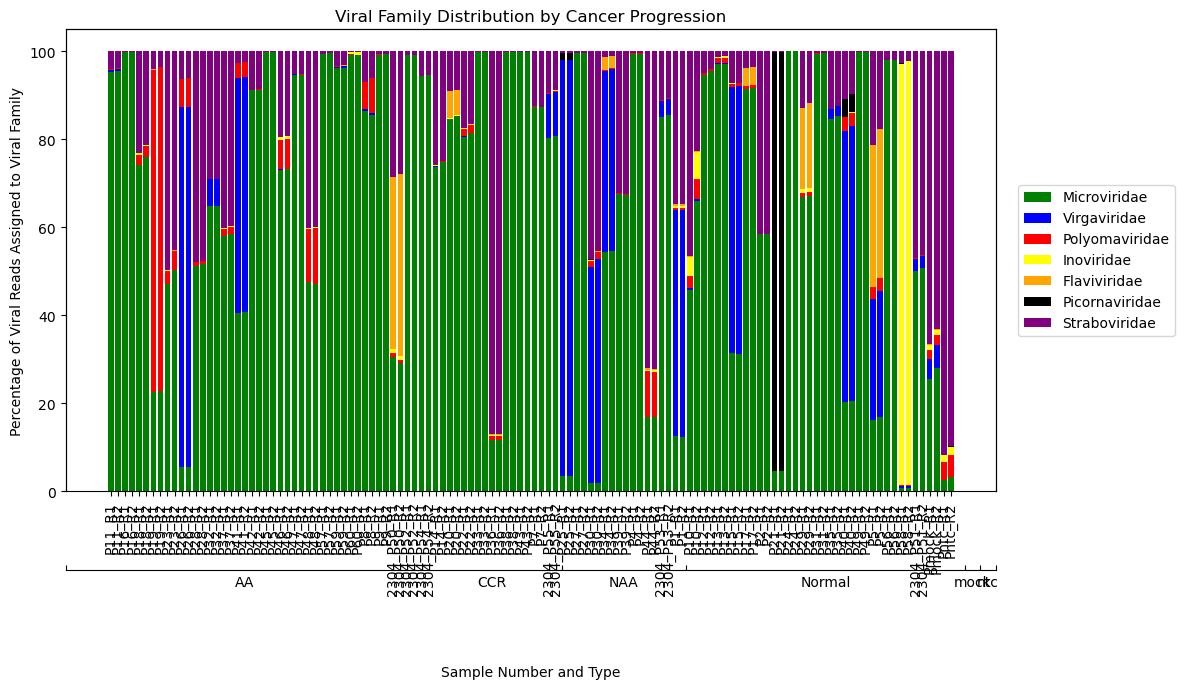

In [8]:
fig, ax = plt.subplots(1, figsize=(12,6))

color_map = {'Microviridae':'Green', 
             'Virgaviridae':'Blue', 
             'Polyomaviridae':'Red', 
             'Inoviridae':'Yellow', 
             'Flaviviridae':'Orange', 
             'Picornaviridae':'Black', 
             'Straboviridae':'Purple', 
             'Retroviridae':'Pink',	
             'Herpesviridae':'Maroon', 
             'Genomoviridae':'Brown', 
             'Poxviridae':'Indigo',
             'Demerecviridae':'Cyan',
             'Papillomaviridae':'Lime',
             'Birnaviridae':'Gold',
             'Alphaflexiviridae':'lightsalmon',
             'Coronaviridae':'powderblue',
             'Salasmaviridae':'cornflowerblue',
             'Arenaviridae':'lightseagreen',
             'Other':'Gray'}

bottom = np.zeros(len(family_data.index))
for (idx, family), color in zip(family_data.iteritems(), color_map.values()):
    if idx != 'sample_type':
        ax.bar(family_data.index, family, bottom=bottom, color=color)
        bottom += family
    
labels = []
colors = []
for sample_name in family_data.index:
    sample = sample_name.split('2303_')[-1].split('-')[0]
    # sample_num = int(sample.split('P')[-1])
    read = sample_name.split('.tsv')[0].split('_')[-1]
    label = f'{sample}_{read}'
    labels.append(label)
    # colors.append(sample_to_color[sample_types[sample_num]])
ax.set_xticklabels(labels, rotation=90)


ax2 = ax.twiny()
ax2.spines["bottom"].set_position(("axes", -0.17))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

ax2.set_xticks(tick_locations)
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator(label_locations))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(counts.index))


ax.set_title('Viral Family Distribution by Cancer Progression')
ax.set_ylabel('Percentage of Viral Reads Assigned to Viral Family')
ax.set_xlabel('Sample Number and Type', labelpad=50)

ax.legend(labels=color_map, loc='right', bbox_to_anchor=(1, 0.5, .2, 0))




## CLR Data for Heatmaps

In [10]:
from skbio.stats.composition import clr

family_data = pd.read_csv('../../AECC_patients_data/output/family_data.csv', index_col=0).fillna(1) ## currently replacing 0s with 1 so can do CLR -- need to decide on statistical methodology for this

family_data

family_data = family_data.div(family_data.sum(axis=0), axis=1)
family_data = family_data.T
clr_data = pd.DataFrame(clr(family_data), columns=family_data.columns, index=family_data.index)
clr_data



clr_data.reset_index(inplace=True)
clr_data['sample_type'] = clr_data['index'].apply(sample_to_cancer)
clr_data['batch'] = clr_data['index'].apply(sample_to_batch)
clr_data['run'] = clr_data['index'].apply(sample_to_run)
clr_data = clr_data.sort_values(by=['sample_type', 'index'])
clr_data.set_index('index', drop=True, inplace=True)
clr_data.drop(clr_data.tail(4).index, inplace=True)



In [11]:
clr_data.to_csv('family_clr_data.csv')

In [25]:
from skbio.stats.composition import clr

species_data = pd.read_csv('../../AECC_patients_data/output/species_data.csv', index_col=0).fillna(1) ## currently replacing 0s with 1 so can do CLR -- need to decide on statistical methodology for this

def sample_to_cancer(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return sample_types[int(sample)]
    except:
        return sample



species_data = species_data.div(species_data.sum(axis=0), axis=1)
species_data['mean'] = species_data.iloc[:, :].mean(axis=1, skipna=True)
species_data = species_data[species_data['mean'] >= 0.0001]
species_data = species_data.drop('mean', axis=1)

species_data = species_data.T
species_data

# clr_data = pd.DataFrame(clr(species_data), columns=species_data.columns, index=species_data.index)
# clr_data

# clr_data.reset_index(inplace=True)
# clr_data['sample_type'] = clr_data['index'].apply(sample_to_cancer)
# clr_data = clr_data.sort_values(by=['sample_type', 'index'])
# clr_data.set_index('index', drop=True, inplace=True)
# clr_data

,Bovine leukemia virus,Infectious bursal disease virus,Betapapillomavirus 2,Colobine gammaherpesvirus 1,Beecentumtrevirus B103,Human cosavirus,Crimean-Congo hemorrhagic fever orthonairovirus,Gemycircularvirus siedo1,Clostridium phage phi3626,Caprine alphaherpesvirus 1,...,Lambdavirus lambda,Human betaherpesvirus 6A,Porcine epidemic diarrhea virus,Changjiang picorna-like virus 5,Husavirus ACS160,Cosavirus D,Skunavirus ASCC191,Goose aviadenovirus A,Hubei picorna-like virus 36,Tequatrovirus gee9062
2304_P54-58281_stool_virome_CACTI_Microbiome10_R2.tsv,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,0.000020,1.011828e-05,1.011828e-05,1.011828e-05,0.000010,1.011828e-05,...,0.000010,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05,1.011828e-05
2304_P53-04629_stool_virome_CACTI_Microbiome10_R1.tsv,5.643102e-05,1.410776e-05,1.410776e-05,4.232327e-05,0.000014,1.410776e-05,1.410776e-05,1.410776e-05,0.000014,1.410776e-05,...,0.000014,1.410776e-05,1.410776e-05,1.410776e-05,1.410776e-05,1.410776e-05,3.103706e-04,5.576796e-02,1.410776e-05,3.555154e-03
2303_P20-35399_stool_virome_CACTI_Microbiome2_R1.tsv,1.663589e-05,1.663589e-05,1.663589e-05,1.663589e-05,0.000017,1.663589e-05,1.663589e-05,1.663589e-05,0.000017,2.606844e-02,...,0.000017,3.327178e-05,4.990767e-05,1.663589e-05,1.663589e-05,1.663589e-05,1.663589e-05,1.663589e-05,1.663589e-05,1.280964e-03
2303_P34-94024_stool_virome_CACTI_Microbiome6_R2.tsv,7.428166e-05,6.752878e-06,6.752878e-06,2.025864e-05,0.000007,6.752878e-06,6.752878e-06,6.752878e-06,0.000007,1.350576e-05,...,0.000007,6.752878e-06,6.752878e-06,1.350576e-05,6.752878e-06,6.752878e-06,4.051727e-05,6.752878e-06,6.752878e-06,6.752878e-06
2303_P31-46077_stool_virome_CACTI_Microbiome6_R1.tsv,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,0.000002,2.212331e-06,2.212331e-06,2.212331e-06,0.000018,2.212331e-06,...,0.000020,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,2.212331e-06,5.707813e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303_P29-33651_stool_virome_CACTI_Microbiome3_R1.tsv,4.368338e-05,4.368338e-05,5.853573e-02,3.931504e-04,0.000044,4.368338e-05,4.368338e-05,4.368338e-05,0.000044,4.368338e-05,...,0.000044,4.368338e-05,3.057837e-04,4.368338e-05,4.368338e-05,4.368338e-05,4.368338e-05,4.368338e-05,4.368338e-05,3.319937e-03
2303_P16-73253_stool_virome_CACTI_Microbiome1_R2.tsv,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,0.000003,5.114650e-07,5.114650e-07,5.114650e-07,0.000007,5.114650e-07,...,0.000064,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07,5.114650e-07
2304_P53-04629_stool_virome_CACTI_Microbiome10_R2.tsv,1.262361e-04,1.402623e-05,1.402623e-05,1.402623e-05,0.000014,1.402623e-05,1.402623e-05,1.402623e-05,0.000014,1.402623e-05,...,0.000014,1.402623e-05,1.402623e-05,1.402623e-05,1.402623e-05,1.402623e-05,3.787082e-04,5.555789e-02,1.402623e-05,1.402623e-05
2303_P17-73945_stool_virome_CACTI_Microbiome1_R1.tsv,4.462484e-03,2.373662e-05,2.373662e-05,2.373662e-05,0.000024,2.373662e-05,2.373662e-05,2.373662e-05,0.000024,2.136296e-04,...,0.000024,2.373662e-05,2.373662e-05,2.373662e-05,2.373662e-05,2.373662e-05,2.373662e-05,2.373662e-05,2.373662e-05,2.967077e-03


In [12]:
clr_data.to_csv('species_clr_data.csv')

## Linear Discriminant Analysis

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

family_data = pd.read_csv('../../AECC_patients_data/output/family_data.csv', index_col=0).fillna(1) ## currently replacing 0s with 1 so can do CLR -- need to decide on statistical methodology for this

def sample_to_cancer(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return sample_types[int(sample)]
    except:
        return sample


family_data = family_data.div(family_data.sum(axis=0), axis=1)
family_data = family_data.T
print(family_data)
clr_data = pd.DataFrame(clr(family_data), columns=family_data.columns, index=family_data.index)


# family_data = family_data.sort_values(by='mean', ascending=False).drop('mean', axis=1)
# family_data.loc['other'] = family_data.iloc[number_to_keep:].sum(axis=0)
# family_data = family_data.drop(family_data.index[range(number_to_keep, len(family_data.index)-1)])
# family_data = family_data.T.sort_index()


clr_data.reset_index(inplace=True)
clr_data['sample_type'] = clr_data['index'].apply(sample_to_cancer)
clr_data = clr_data.sort_values(by=['sample_type', 'index'])
clr_data.set_index('index', drop=True, inplace=True)
clr_data.drop(clr_data.tail(4).index, inplace=True)


X = clr_data.iloc[:, :len(clr_data.columns)-1].to_numpy()
y = clr_data['sample_type'].to_numpy()



clf = LinearDiscriminantAnalysis()
data_plot = clf.fit(X, y).tranform(X)

target_names = np.unique(clr_data['sample_type'])

plt.figure()
colors = ['red', 'green', 'blue', 'purple']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

                                                    Arenaviridae  Hepeviridae  \
2304_P54-58281_stool_virome_CACTI_Microbiome10_...      0.000022     0.000011   
2304_P53-04629_stool_virome_CACTI_Microbiome10_...      0.009986     0.000064   
2303_P20-35399_stool_virome_CACTI_Microbiome2_R...      0.016296     0.000019   
2303_P34-94024_stool_virome_CACTI_Microbiome6_R...      0.000902     0.000014   
2303_P31-46077_stool_virome_CACTI_Microbiome6_R...      0.000005     0.000002   
...                                                          ...          ...   
2303_P29-33651_stool_virome_CACTI_Microbiome3_R...      0.000201     0.000201   
2303_P16-73253_stool_virome_CACTI_Microbiome1_R...      0.000002     0.000001   
2304_P53-04629_stool_virome_CACTI_Microbiome10_...      0.008870     0.000048   
2303_P17-73945_stool_virome_CACTI_Microbiome1_R...      0.000030     0.000060   
2303_P35-43694_stool_virome_CACTI_Microbiome6_R...      0.034566     0.000030   

                           

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'tranform'

## Go-Term Analysis

#### Viral

In [26]:
viral_go_counts = pd.read_csv('go_terms_counts_viral.csv', index_col=0) + 1

## Normalize counts
viral_go_counts = viral_go_counts.T
viral_go_counts = viral_go_counts[viral_go_counts.columns.drop(list(viral_go_counts.filter(regex='mock')))]
viral_go_counts = viral_go_counts[viral_go_counts.columns.drop(list(viral_go_counts.filter(regex='Pntc')))]
viral_go_counts = viral_go_counts.div(viral_go_counts.sum(axis=0), axis=1).T
viral_go_counts

## clr
viral_go_clr = pd.DataFrame(clr(viral_go_counts), columns=viral_go_counts.columns, index=viral_go_counts.index)
viral_go_clr

## add other columns
viral_go_output = viral_go_clr.reset_index()
viral_go_output['sample_type'] = viral_go_output['index'].apply(sample_to_cancer)
viral_go_output['batch'] = viral_go_output['index'].apply(sample_to_batch)
viral_go_output = viral_go_output.set_index('index')
viral_go_output = viral_go_output.sort_index()



# ## For export to R
viral_go_output.to_csv('go_terms_normalized.csv')
viral_go_output


,disable_organ,cytotoxicity,degrade_ecm,induce_inflammation,bacterial_counter_signaling,viral_counter_signaling,resist_complement,counter_immunoglobulin,plant_rna_silencing,resist_oxidative,...,secreted_effector,antibiotic_resistance,develop_in_host,nonviral_adhesion,secretion,toxin_synthase,viral_adhesion,virulence_regulator,sample_type,batch
index,,,,,,,,,,,,,,,,,,,,,
2303_P1-32635_stool_virome_CACTI_Microbiome8_R1.tsv,-2.067883,-2.067883,-2.067883,-1.374736,-2.067883,3.408581,-2.067883,-2.067883,7.386109,-2.067883,...,-2.067883,-0.681589,-2.067883,-2.067883,0.704706,-1.374736,4.048009,-2.067883,Normal,6
2303_P1-32635_stool_virome_CACTI_Microbiome8_R2.tsv,-2.045274,-2.045274,-2.045274,-2.045274,-2.045274,3.511554,-2.045274,-2.045274,7.407934,-2.045274,...,-2.045274,-0.658980,-2.045274,-2.045274,0.727315,-1.352127,4.113821,-2.045274,Normal,6
2303_P10-64142_stool_virome_CACTI_Microbiome4_R1.tsv,-1.076791,-1.076791,-1.076791,-1.076791,-1.076791,2.773356,-0.383644,-1.076791,1.002650,-1.076791,...,-1.076791,-1.076791,-1.076791,-1.076791,-1.076791,-1.076791,3.487557,-1.076791,Normal,1
2303_P10-64142_stool_virome_CACTI_Microbiome4_R2.tsv,-1.084745,-1.084745,-1.084745,-1.084745,-1.084745,2.578816,-1.084745,-1.084745,0.861165,-1.084745,...,-1.084745,-1.084745,-1.084745,-1.084745,-1.084745,-1.084745,3.415064,-1.084745,Normal,1
2303_P11-65514_stool_virome_CACTI_Microbiome4_R1.tsv,-1.585706,-1.585706,-1.585706,-1.585706,-1.585706,4.898929,-1.585706,-1.585706,3.747013,-1.585706,...,-1.585706,-1.585706,-1.585706,-1.585706,-1.585706,-1.585706,5.033033,-1.585706,AA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304_P53-04629_stool_virome_CACTI_Microbiome10_R2.tsv,-1.314111,-1.314111,-1.314111,-1.314111,-1.314111,2.053184,-1.314111,-1.314111,5.835020,-1.314111,...,-1.314111,0.295326,-1.314111,-1.314111,-1.314111,-1.314111,3.803882,-1.314111,NAA,7
2304_P54-58281_stool_virome_CACTI_Microbiome10_R1.tsv,-1.254275,-1.254275,-1.254275,-0.561128,-1.254275,4.876952,-1.254275,-1.254275,0.691635,-1.254275,...,-1.254275,-1.254275,-1.254275,-1.254275,-1.254275,-1.254275,3.605537,-1.254275,AA,7
2304_P54-58281_stool_virome_CACTI_Microbiome10_R2.tsv,-1.143741,-1.143741,-1.143741,-1.143741,-1.143741,4.980943,-1.143741,-1.143741,-0.450593,-1.143741,...,-1.143741,-1.143741,-1.143741,-1.143741,-1.143741,-1.143741,3.700447,-1.143741,AA,7


#### all

In [24]:
go_counts = pd.read_csv('go_terms_counts.csv', index_col=0) + 1

## Normalize counts
go_counts = go_counts.T
go_counts = go_counts[go_counts.columns.drop(list(go_counts.filter(regex='mock')))]
go_counts = go_counts[go_counts.columns.drop(list(go_counts.filter(regex='Pntc')))]
go_counts = go_counts.div(go_counts.sum(axis=0), axis=1).T
go_counts

## clr
go_counts_clr = pd.DataFrame(clr(go_counts), columns=go_counts.columns, index=go_counts.index)
go_counts_clr

## add other columns
go_output = go_counts_clr.reset_index()
go_output['sample_type'] = go_output['index'].apply(sample_to_cancer)
go_output['batch'] = go_output['index'].apply(sample_to_batch)
go_output['run'] = go_output['index'].apply(sample_to_run)
go_output = go_output.set_index('index')
go_output = go_output.sort_index()



# ## For export to R
go_output.to_csv('go_terms_normalized.csv')
go_output

,disable_organ,cytotoxicity,degrade_ecm,induce_inflammation,bacterial_counter_signaling,viral_counter_signaling,resist_complement,counter_immunoglobulin,plant_rna_silencing,resist_oxidative,...,antibiotic_resistance,develop_in_host,nonviral_adhesion,secretion,toxin_synthase,viral_adhesion,virulence_regulator,sample_type,batch,run
index,,,,,,,,,,,,,,,,,,,,,
2303_P1-32635_stool_virome_CACTI_Microbiome8_R1.tsv,0.359837,0.379255,-1.780230,0.810038,1.314594,1.746131,-4.265136,-4.265136,5.189326,-0.601575,...,3.885909,-4.265136,-1.867241,3.987831,2.275894,2.381254,0.141583,Normal,6,8
2303_P1-32635_stool_virome_CACTI_Microbiome8_R2.tsv,0.293077,0.390241,-1.806984,0.751535,1.299097,1.801679,-4.291890,-4.291890,5.161788,-0.603011,...,3.872051,-4.291890,-1.806984,3.941081,2.303890,2.386452,0.025598,Normal,6,8
2303_P10-64142_stool_virome_CACTI_Microbiome4_R1.tsv,0.184097,1.100387,-2.118488,-1.425341,0.279407,1.888845,-1.425341,-2.118488,-0.039047,-2.118488,...,4.308000,-2.118488,-2.118488,4.710224,2.554340,2.725699,-1.019876,Normal,1,4
2303_P10-64142_stool_virome_CACTI_Microbiome4_R2.tsv,0.386913,1.040839,-1.079424,-1.484890,-0.232127,1.606153,-2.178037,-2.178037,-0.232127,-2.178037,...,4.188434,-2.178037,-2.178037,4.695127,2.673994,2.601087,-0.386277,Normal,1,4
2303_P11-65514_stool_virome_CACTI_Microbiome4_R1.tsv,0.038748,-2.040693,-2.733841,-1.124403,-1.347546,3.866030,-2.733841,-2.733841,2.603697,-2.733841,...,2.283439,-2.733841,-2.040693,6.274506,4.499615,4.018430,-0.942081,AA,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304_P53-04629_stool_virome_CACTI_Microbiome10_R2.tsv,-1.394329,0.802896,-1.394329,-1.799794,-0.883503,1.117977,-2.492941,-2.492941,4.656191,-2.492941,...,2.975119,-2.492941,-2.492941,4.420797,5.881305,2.834935,-1.394329,NAA,7,10
2304_P54-58281_stool_virome_CACTI_Microbiome10_R1.tsv,0.368609,2.379997,-2.575830,2.434806,-0.966392,3.612435,-2.575830,-2.575830,-0.378605,-1.882682,...,3.687569,-2.575830,-2.575830,2.681666,2.236355,2.524037,-1.882682,AA,7,10
2304_P54-58281_stool_virome_CACTI_Microbiome10_R2.tsv,0.420379,2.478767,-2.469993,2.527220,-0.860555,3.699618,-2.469993,-2.469993,-1.371380,-1.776846,...,3.795309,-2.469993,-1.776846,2.766449,2.221355,2.513614,-2.469993,AA,7,10


## Alpha Diversity

#### Family Level Alpha Diversity

<Axes: xlabel='sample_type', ylabel='tax_counts'>

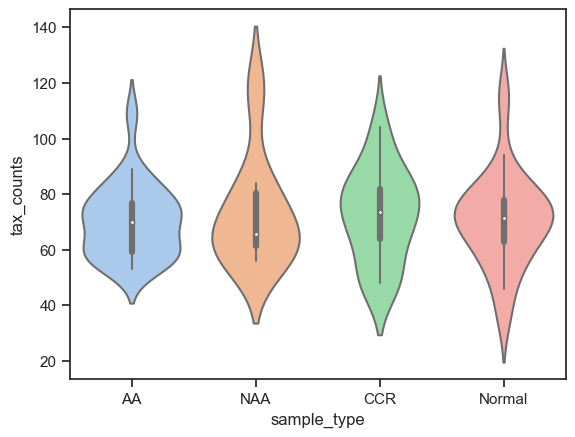

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

family_data = pd.read_csv('../../AECC_patients_data/output/family_data.csv', index_col=0).fillna(0)

## drop the unimportant cols
family_data = family_data[family_data.columns.drop(list(family_data.filter(regex='mock')))]
family_data = family_data[family_data.columns.drop(list(family_data.filter(regex='Pntc')))]

samp_types = family_data.T.reset_index()['index'].apply(sample_to_cancer)
tax_counts = family_data.astype(bool).sum(axis=0)

# family_data
# print(len(samp_types))
# print(len(tax_counts))

data = {'sample_name': list(family_data.columns),
        'sample_type': samp_types.values,
        'tax_counts': tax_counts.values}

alpha_diversity = pd.DataFrame(data)

sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=alpha_diversity, x="sample_type", y="tax_counts")

In [17]:
## PVALUES
from scipy.stats import ttest_ind

normal_patients = alpha_diversity[alpha_diversity['sample_type'] == 'Normal']
crc_patients = alpha_diversity[alpha_diversity['sample_type'] == 'CCR']
aa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'AA']
naa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'NAA']

print(ttest_ind(normal_patients['tax_counts'], crc_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(aa_patients['tax_counts'], naa_patients['tax_counts']))


Ttest_indResult(statistic=-0.3616237424926849, pvalue=0.7190985267288881)
Ttest_indResult(statistic=0.13456323217705576, pvalue=0.8932951850303384)
Ttest_indResult(statistic=-0.5054996318964776, pvalue=0.6154291999012782)
Ttest_indResult(statistic=0.5573533386715249, pvalue=0.579292768745097)
Ttest_indResult(statistic=-0.1514793344134469, pvalue=0.8805485699187949)
Ttest_indResult(statistic=-0.7199451439193697, pvalue=0.4743540490250491)


#### Genus Level Alpha Diversity

<Axes: xlabel='sample_type', ylabel='tax_counts'>

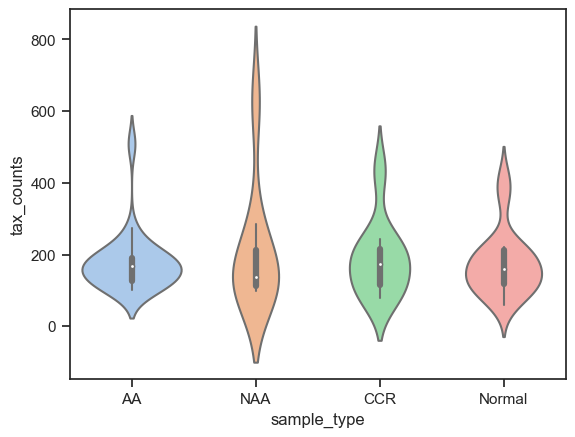

In [18]:
genus_data = pd.read_csv('../../AECC_patients_data/output/genus_data.csv', index_col=0).fillna(0)

## drop the unimportant cols
genus_data = genus_data[genus_data.columns.drop(list(genus_data.filter(regex='mock')))]
genus_data = genus_data[genus_data.columns.drop(list(genus_data.filter(regex='Pntc')))]

samp_types = genus_data.T.reset_index()['index'].apply(sample_to_cancer)
tax_counts = genus_data.astype(bool).sum(axis=0)

# family_data
# print(len(samp_types))
# print(len(tax_counts))

data = {'sample_name': list(genus_data.columns),
        'sample_type': samp_types.values,
        'tax_counts': tax_counts.values}

alpha_diversity = pd.DataFrame(data)

sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=alpha_diversity, x="sample_type", y="tax_counts")

In [19]:
## PVALUES
from scipy.stats import ttest_ind

normal_patients = alpha_diversity[alpha_diversity['sample_type'] == 'Normal']
crc_patients = alpha_diversity[alpha_diversity['sample_type'] == 'CCR']
aa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'AA']
naa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'NAA']

print(ttest_ind(normal_patients['tax_counts'], crc_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(aa_patients['tax_counts'], naa_patients['tax_counts']))

Ttest_indResult(statistic=-0.48007221110661513, pvalue=0.6331893852104948)
Ttest_indResult(statistic=-0.11567636547799609, pvalue=0.9081989099137656)
Ttest_indResult(statistic=-0.9961891024016062, pvalue=0.32395508611152013)
Ttest_indResult(statistic=0.44094869374290263, pvalue=0.6607839519102012)
Ttest_indResult(statistic=-0.47424158996156046, pvalue=0.6385478421503519)
Ttest_indResult(statistic=-1.0420597613024254, pvalue=0.3015646804056257)


#### Species Level Alpha Diversity

<Axes: xlabel='sample_type', ylabel='tax_counts'>

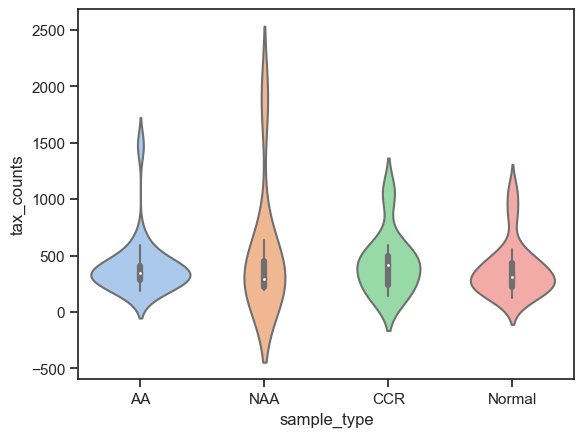

In [20]:
species_data = pd.read_csv('../../AECC_patients_data/output/species_data.csv', index_col=0).fillna(0)

## drop the unimportant cols
species_data = species_data[species_data.columns.drop(list(species_data.filter(regex='mock')))]
species_data = species_data[species_data.columns.drop(list(species_data.filter(regex='Pntc')))]

samp_types = species_data.T.reset_index()['index'].apply(sample_to_cancer)
tax_counts = species_data.astype(bool).sum(axis=0)

# family_data
# print(len(samp_types))
# print(len(tax_counts))

data = {'sample_name': list(species_data.columns),
        'sample_type': samp_types.values,
        'tax_counts': tax_counts.values}

alpha_diversity = pd.DataFrame(data)

sns.set_theme(style="ticks", palette="pastel")
sns.violinplot(data=alpha_diversity, x="sample_type", y="tax_counts")


In [21]:
## PVALUES
from scipy.stats import ttest_ind

normal_patients = alpha_diversity[alpha_diversity['sample_type'] == 'Normal']
crc_patients = alpha_diversity[alpha_diversity['sample_type'] == 'CCR']
aa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'AA']
naa_patients = alpha_diversity[alpha_diversity['sample_type'] == 'NAA']

print(ttest_ind(normal_patients['tax_counts'], crc_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(normal_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], aa_patients['tax_counts']))
print(ttest_ind(crc_patients['tax_counts'], naa_patients['tax_counts']))
print(ttest_ind(aa_patients['tax_counts'], naa_patients['tax_counts']))

Ttest_indResult(statistic=-0.7431793420124974, pvalue=0.46071769147889363)
Ttest_indResult(statistic=-0.3765032299949975, pvalue=0.7075395478647755)
Ttest_indResult(statistic=-1.2729496049197004, pvalue=0.2089230336465362)
Ttest_indResult(statistic=0.45388533668234293, pvalue=0.6514962302587555)
Ttest_indResult(statistic=-0.5833657817061042, pvalue=0.5637363872705468)
Ttest_indResult(statistic=-1.1488176152366265, pvalue=0.255190472804308)


## Bray-Curtis Dissimilarity (Beta Diversity)

/mnt/netapp2/Store_uni/home/uvi/be/rdo/miniconda3/envs/SeqScreenEnv/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2704445151236809 and the largest is 9.110669291163596.
  warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{1: 'Normal', 2: 'Normal', 3: '', 4: 'NAA', 5: 'Normal', 6: '', 7: 'CCR', 8: 'AA', 9: 'AA', 10: 'Normal', 11: 'AA', 12: 'Normal', 13: 'Normal', 14: 'CCR', 15: 'Normal', 16: 'AA', 17: 'Normal', 18: 'AA', 19: 'AA', 20: 'CCR', 21: 'Normal', 22: 'CCR', 23: 'AA', 24: 'Normal', 25: 'NAA', 26: 'AA', 27: 'NAA', 28: 'AA', 29: 'Normal', 30: 'NAA', 31: 'Normal', 32: 'AA', 33: 'CCR', 34: 'NAA', 35: 'Normal', 36: 'CCR', 37: 'AA', 38: 'CCR', 39: 'NAA', 40: 'Normal', 41: 'AA', 42: 'AA', 43: 'CCR', 44: 'NAA', 45: 'AA', 46: 'AA', 47: 'AA', 48: 'AA', 49: 'Normal', 50: 'AA', 51: 'Normal', 52: 'AA', 53: 'NAA', 54: 'AA', 55: 'CCR', 56: 'Normal', 57: 'AA', 58: 'Normal', 59: 'AA', 60: 'AA', 61: 'Normal'}
['Green', 'Green', 'Green', 'Green', 'Orange', 'Orange', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Green', 'Green', 'Orange', 'Orange', 'Green', 'Green', 'Orange', 'Orange', 'Orange', 'Orange', 'Green', 'Green', 'Red', 'Red', 'Green', 'Green', 'Red', 'Red', 'Orange', 'Orange', 'Green', 'Green', 'Yel

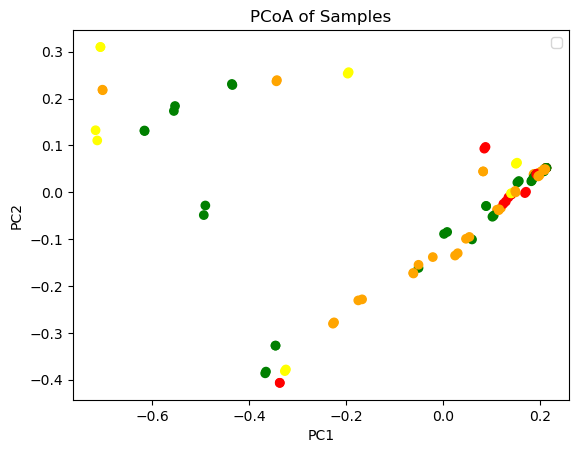

In [43]:
from scipy.spatial.distance import pdist, squareform
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import seaborn as sns

family_data = pd.read_csv('../../AECC_patients_data/output/family_data.csv', index_col=0).fillna(0)

def sample_to_cancer(name):
    sample = name.split('_P')[-1].split('-')[0]
    try:
        return sample_types[int(sample)]
    except:
        return sample


## convert data from read counts to abundance of viral families and get the sample types before converting to numpy array for bc
family_data = family_data.div(family_data.sum(axis=0), axis=1)
family_data = family_data[family_data.columns.drop(list(family_data.filter(regex='mock')))]
family_data = family_data[family_data.columns.drop(list(family_data.filter(regex='Pntc')))]
family_data = family_data.T.sort_index()

samp_types = family_data.reset_index()['index'].apply(sample_to_cancer)
family_data = family_data.to_numpy()

## calculate bray curtis distance
bc = squareform(pdist(family_data, "braycurtis"))

## get pcoa
pcoa_results = pcoa(bc)
pcoa_coords = pcoa_results.samples

##plot after getting colors
type_to_cancer = {
    'NAA': 'Yellow',
    'AA': 'Orange',
    'CCR': 'Red',
    'Normal': 'Green'
}
plot_colors = [type_to_cancer[sample_type] for sample_type in samp_types]
print(sample_types)
print(plot_colors)

fig, ax = plt.subplots()
scatter = ax.scatter(pcoa_coords['PC1'], pcoa_coords['PC2'], c=plot_colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCoA of Samples')

ax.legend()

plt.show()

